In [8]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

I dont expect there to be a correlation between sex and island or between sex and species.

In [13]:
contingencyTableSpecies = penguins.groupby(['sex','species']).size().unstack('sex', fill_value=0)
contingencyTableSpecies

sex        Female  Male
species                
Adelie         73    73
Chinstrap      34    34
Gentoo         58    61

<AxesSubplot:xlabel='species'>

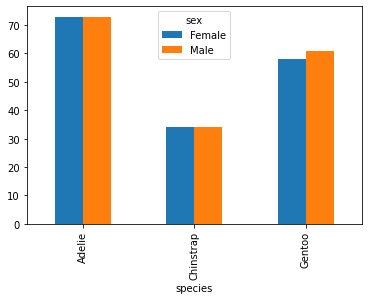

In [19]:
contingencyTableSpecies.plot(kind='bar')

In [9]:
chi2_contingency(contingencyTableSpecies)

(0.04860717014078319,
 0.9759893689765846,
 2,
 array([[72.34234234, 33.69369369, 58.96396396],
        [73.65765766, 34.30630631, 60.03603604]]))

Since the outcome of the chi2 test is 0.9759893689765846 there is about a 3% chance that there is a correlation between sex and species. This is lower than a 95% chance and this means there is no correlation between sex and species.

In [16]:
contingencyTableIsland = penguins.groupby(['sex','island']).size().unstack('sex', fill_value=0)
contingencyTableIsland

sex        Female  Male
island                 
Biscoe         80    83
Dream          61    62
Torgersen      24    23

<AxesSubplot:xlabel='island'>

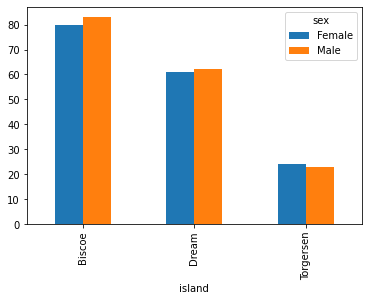

In [17]:
contingencyTableIsland.plot(kind='bar')

In [18]:
chi2_contingency(contingencyTableIsland)

(0.05759904881286207,
 0.971611229281065,
 2,
 array([[80.76576577, 82.23423423],
        [60.94594595, 62.05405405],
        [23.28828829, 23.71171171]]))

Since the outcome of the chi2 test is 0.971611229281065 there is about a 3% chance that there is a correlation between sex and island. This is lower than a 95% chance and this means there is no correlation between sex and island.